In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [2]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df = df.rename ({'DEATH_EVENT' : 'death'}, axis = 1)

In [5]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

In [7]:
# Percentage Calculation of death Event
no = (203 / (203+96)) *100
yes = (96 / (203+96)) *100

In [8]:
no

67.89297658862876

In [9]:
yes

32.10702341137124

# Data Visualization

<AxesSubplot:xlabel='death', ylabel='count'>

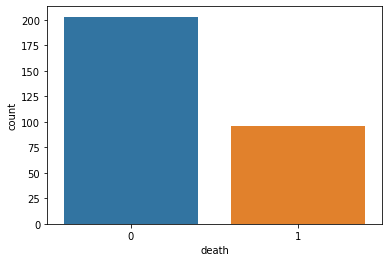

In [10]:
sns.countplot (x='death', data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

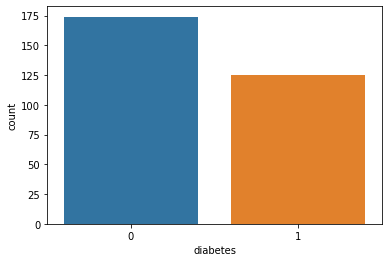

In [11]:
sns.countplot (x='diabetes', data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

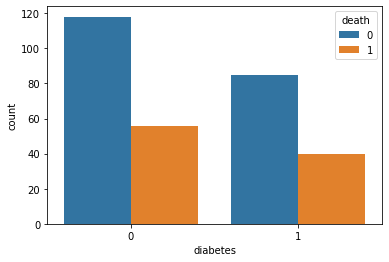

In [26]:
sns.countplot (x= 'diabetes', data=df, hue= 'death')

# Training & Testing the Model

In [27]:
x = df.drop('death', axis=1)

In [28]:
y = df['death']

In [29]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split (x, y, train_size=.70, random_state=78)

In [48]:
xtrain

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
276,70.0,0,618,0,35,0,327000.00,1.10,142,0,0,245
270,44.0,0,582,1,30,1,263358.03,1.60,130,1,1,244
16,87.0,1,149,0,38,0,262000.00,0.90,140,1,0,14
218,68.0,1,1021,1,35,0,271000.00,1.10,134,1,0,197
274,60.0,1,257,1,30,0,150000.00,1.00,137,1,1,245
...,...,...,...,...,...,...,...,...,...,...,...,...
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26
184,58.0,1,145,0,25,0,219000.00,1.20,137,1,1,170
105,72.0,1,328,0,30,1,621000.00,1.70,138,0,1,88
40,70.0,0,582,0,20,1,263358.03,1.83,134,1,1,31


In [49]:
ytrain

276    0
270    0
16     1
218    0
274    0
      ..
29     1
184    1
105    1
40     1
197    0
Name: death, Length: 209, dtype: int64

In [50]:
ytest

75     1
91     0
298    0
294    0
169    0
      ..
56     0
266    1
288    0
192    0
245    0
Name: death, Length: 90, dtype: int64

In [51]:
ytest.shape

(90,)

In [52]:
xtest.shape

(90, 12)

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier()

In [55]:
dt.fit (xtrain, ytrain)

DecisionTreeClassifier()

In [56]:
pred = dt.predict(xtest)

In [57]:
pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [58]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [59]:
dt.score(xtest, ytest)

0.7666666666666667

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
clf = RandomForestClassifier()

In [62]:
clf.fit (xtrain, ytrain)

RandomForestClassifier()

In [63]:
clf.score(xtest,ytest)

0.8888888888888888

# Hyper Parameter Tuning: GridSearchCV

In [64]:
trees = np.random.randint (20,200,25)

In [66]:
trees

array([ 31, 196, 114,  54, 137,  60,  93, 144, 100,  59, 182,  71, 176,
       176, 159, 145,  33,  98,  75,  68,  62,  40,  32,  79,  42])

In [67]:
criterion = ['gini','entropy']
max_depth = np.random.randint(1,20,25)
min_samples_split = [2,3,4]
max_features = ['sqrt','log2']

In [68]:
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
gcv= GridSearchCV(clf,ids)

In [72]:
gcv.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([19, 14,  8, 10,  4, 18, 18, 15,  8,  5, 16,  8, 17, 17, 19,  4, 15,
       14,  2,  4, 11,  5, 10, 11, 15]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([ 31, 196, 114,  54, 137,  60,  93, 144, 100,  59, 182,  71, 176,
       176, 159, 145,  33,  98,  75,  68,  62,  40,  32,  79,  42])})

In [73]:
gcv.cv_results_

{'mean_fit_time': array([0.03575335, 0.19751372, 0.10594006, ..., 0.04599476, 0.13652191,
        0.06996951]),
 'std_fit_time': array([0.01216369, 0.04535529, 0.0128263 , ..., 0.01196778, 0.02518811,
        0.01482428]),
 'mean_score_time': array([0.00480609, 0.01284809, 0.02294345, ..., 0.00503111, 0.01041088,
        0.0079577 ]),
 'std_score_time': array([0.00315853, 0.00019894, 0.02428232, ..., 0.00165557, 0.00329815,
        0.0038111 ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[19, 19, 19, ..., 15, 15, 15],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
              mask=[Fal

In [74]:
result = pd.DataFrame(gcv.cv_results_)

In [75]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035753,0.012164,0.004806,0.003159,gini,19,sqrt,2,31,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.833333,0.714286,0.690476,0.785714,0.804878,0.765738,0.054428,7467
1,0.197514,0.045355,0.012848,0.000199,gini,19,sqrt,2,196,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.857143,0.785714,0.785714,0.857143,0.804878,0.818118,0.032623,952
2,0.105940,0.012826,0.022943,0.024282,gini,19,sqrt,2,114,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.857143,0.785714,0.714286,0.833333,0.756098,0.789315,0.051544,6604
3,0.048435,0.001200,0.004386,0.000489,gini,19,sqrt,2,54,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.857143,0.738095,0.738095,0.857143,0.756098,0.789315,0.055770,6604
4,0.134536,0.026915,0.010166,0.001465,gini,19,sqrt,2,137,"{'criterion': 'gini', 'max_depth': 19, 'max_fe...",0.833333,0.785714,0.738095,0.833333,0.780488,0.794193,0.035974,5749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.079991,0.010711,0.007007,0.002478,entropy,15,log2,4,62,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.857143,0.738095,0.738095,0.809524,0.780488,0.784669,0.045224,6835
7496,0.064409,0.013937,0.004599,0.000499,entropy,15,log2,4,40,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.833333,0.738095,0.714286,0.857143,0.804878,0.789547,0.054833,6208
7497,0.045995,0.011968,0.005031,0.001656,entropy,15,log2,4,32,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.880952,0.785714,0.738095,0.857143,0.804878,0.813357,0.050964,1619
7498,0.136522,0.025188,0.010411,0.003298,entropy,15,log2,4,79,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.833333,0.761905,0.714286,0.880952,0.804878,0.799071,0.057414,4541


In [76]:
gcv.best_score_

0.8563298490127759

In [77]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 40}

In [87]:
clf1 = RandomForestClassifier (
    criterion = 'entropy',
    max_depth = 4,
    max_features = 'sqrt',
    min_samples_split = 2,
    n_estimators = 40
)

In [88]:
clf1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=40)

In [89]:
clf1.score(xtest,ytest)

0.9333333333333333

### Alternative Way

In [92]:
clf2 = gcv.best_estimator_

In [93]:
clf2

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=40)

In [94]:
clf2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=40)

In [95]:
clf2.score(xtest,ytest)

0.9111111111111111